In [ ]:
! pip install gradio

In [2]:
import gradio as gr

In [5]:
! pip install tensorflow


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.23.0 which is incompatible.


  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
     -------------------------------------- 272.8/272.8 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 5.6/5.6 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1130, in 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

C:\Users\HP\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


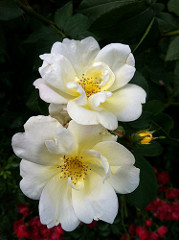

In [8]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


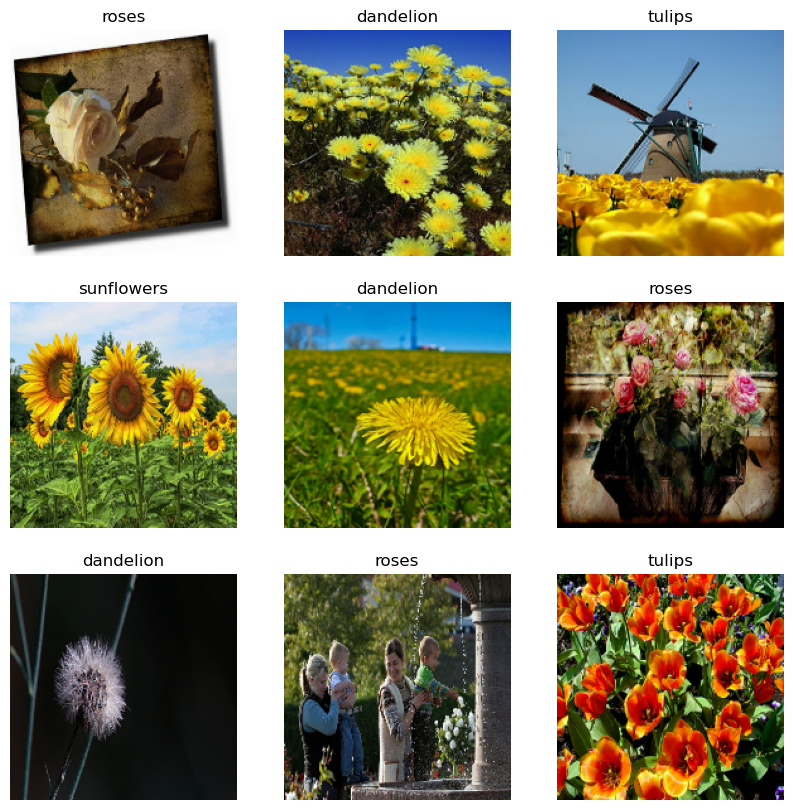

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


c:\Users\HP\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 30s 312ms/step - loss: 1.3291 - accuracy: 0.4305 - val_loss: 1.1224 - val_accuracy: 0.5559
Epoch 2/10
92/92 [==============================] - 28s 302ms/step - loss: 1.0209 - accuracy: 0.6032 - val_loss: 1.0188 - val_accuracy: 0.5995
Epoch 3/10
92/92 [==============================] - 28s 305ms/step - loss: 0.8323 - accuracy: 0.6829 - val_loss: 0.9163 - val_accuracy: 0.6499
Epoch 4/10
92/92 [==============================] - 28s 307ms/step - loss: 0.6025 - accuracy: 0.7779 - val_loss: 0.9847 - val_accuracy: 0.6499
Epoch 5/10
92/92 [==============================] - 29s 308ms/step - loss: 0.4131 - accuracy: 0.8491 - val_loss: 1.1425 - val_accuracy: 0.6308
Epoch 6/10
92/92 [==============================] - 29s 308ms/step - loss: 0.2257 - accuracy: 0.9230 - val_loss: 1.3552 - val_accuracy: 0.6131
Epoch 7/10
92/92 [==============================] - 29s 309ms/step - loss: 0.1350 - accuracy: 0.9601 - val_loss: 1.5097 - val_accuracy: 0.6540
Epoch 8/10

In [16]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [17]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

c:\Users\HP\anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\HP\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\gradio\routes.py", line 414, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\HP\anaconda3\lib\site-packages\gradio\blocks.py", line 1320, in process_api
    result = await self.call_function(
  File "c:\Users\HP\anaconda3\lib\site-packages\gradio\blocks.py", line 1048, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\HP\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "c:\Users\HP\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "c:\Users\HP\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18872\431426499.py", line 2, in predict

1/1 [==============================] - 0s 32ms/step
Keyboard interruption in main thread... closing server.
